In [4]:
from graph import *
%matplotlib inline

-> ajouter poids ou non dans graphe ?

-> todo label tridimensionel

-> calculer matrice labels

-> envoyer visualisation

In [5]:
%%time
db, path = gen_export_db(50,20,10,5,0.05)

CPU times: user 352 ms, sys: 0 ns, total: 352 ms
Wall time: 372 ms


In [6]:
path

'dbs/db-1549988464.8259.dat'

In [7]:
db.shape

(1050, 2)

In [8]:
db[:,1]

array(['grid', 'grid', 'grid', ..., 'ring', 'ring', 'ring'], dtype=object)

In [9]:
np.unique(db[:,1],return_counts=True)

(array(['chain', 'cube', 'grid', 'ring', 'star', 'tree'], dtype=object),
 array([105, 168, 294, 147, 168, 168]))

In [1]:
%matplotlib inline
from graph import *
from kernels import *

max N 20
max M 80
1.0
CPU times: user 13.8 s, sys: 21.2 s, total: 35 s
Wall time: 4.41 s


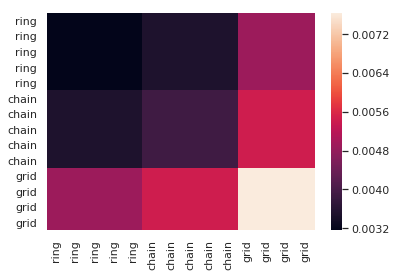

In [3]:
%%time
db2, path = gen_export_db(4,4,10,5,0.1,True)
test(db2)
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

In [9]:
from time import time
X = []
Y = []aa
#on varie nb altered
for i in range(1,4):
    X.append(i*3)
    db2, path = gen_export_db(3,i,10,5,0.05)
    t = time()
    test(db2)
    diff = time()-t
    Y.append(diff)
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.title("Complexité du calcul du noyau + apprentissage SVM en fonction du nombre de graphes de 8<=N<=10")

SyntaxError: invalid syntax (<ipython-input-9-b615c2e80e1f>, line 3)

In [ ]:
import seaborn as sns

In [ ]:
v = np.random.random((5))
v2 = np.random.random((5))
v3 = np.random.random((5))
v4 = np.random.random((5))
#v /= np.linalg.norm(v)
#v2 /= np.linalg.norm(v2)
#v3 /= np.linalg.norm(v3)
#v4 /= np.linalg.norm(v4)
db = [v,v2,v3,v4]
gram = np.empty((len(db),len(db)))
for i in range(len(db)):
    for j in range(i+1):
        ker = np.dot(db[i],db[j])
        gram[i, j] = ker
        if i != j:
            gram[j, i] = ker
sns.heatmap(gram)

In [13]:
from graph import *
import networkx as nx
from random import random
import numpy.random as npr
import matplotlib.pyplot as plt

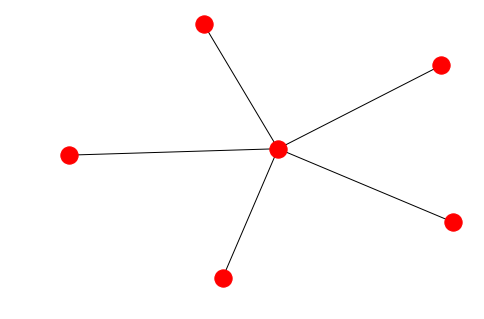

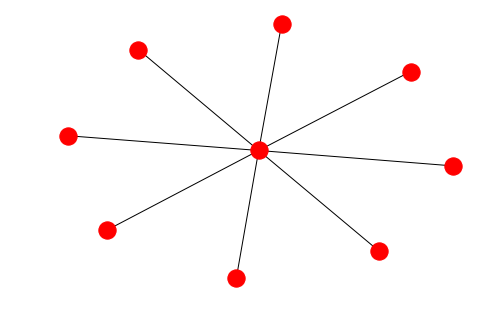

In [43]:
s = gen_graph("star",5,1)
nx.draw(s)
plt.figure()
#alter 2
count = 2
if random()<0.5:
    s = nx.star_graph(len(s.nodes())-count)
else:
    s = nx.star_graph(len(s.nodes())+count)
nx.draw(s)

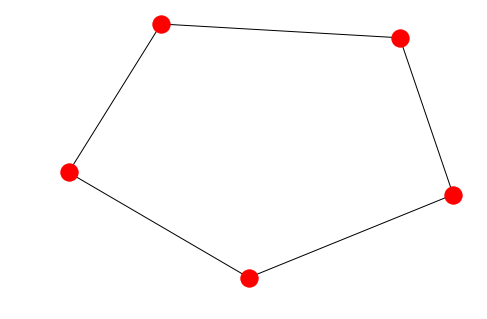

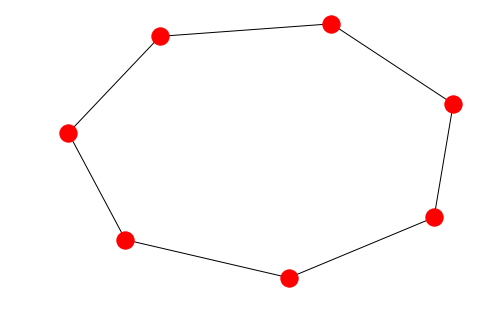

In [42]:
s = gen_graph("ring",5,1)
nx.draw(s)
plt.figure()
#alter 2
count = 2
if random()<0.5:
    s = nx.cycle_graph(len(s.nodes())-count)
else:
    s = nx.cycle_graph(len(s.nodes())+count)
nx.draw(s)

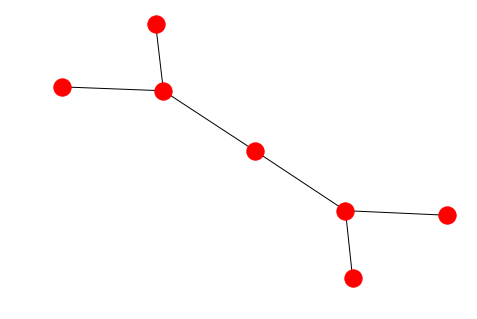

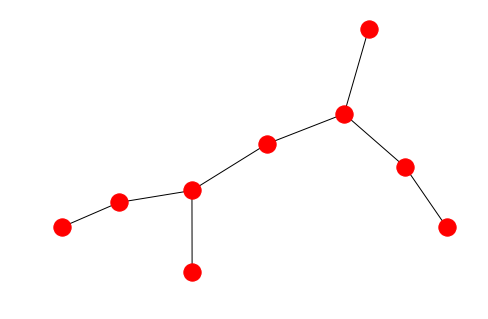

In [48]:
s = gen_graph("tree",5,1)
#modifier pour rajouter nb de noeuds manquants si taille inferieure à demandée
nx.draw(s)
plt.figure()
#alter 2
count = 2
if random()<0.5:
    while count > 0:
        n = npr.choice(s.nodes())
        if s.degree[n]==1:
            count -= 1
            s.remove_nodes_from([n])
else:
    while count > 0:
        n = npr.choice(s.nodes())
        if s.degree[n]==1:
            count -= 1
            n2 = len(s.nodes())
            s.add_node(n2)
            s.add_edge(n,n2)
nx.draw(s)

In [4]:
GS = gen_graph("star",2,1)
A_ = nx.to_numpy_matrix(GS).T
D = np.diagflat(1/np.sum(A_,axis=0))
A = A_ @ D

In [13]:
np.sum(A,axis=0)

matrix([[1., 1., 1.]])

In [14]:
G2 = gen_graph("star",3,1)
A_ = nx.to_numpy_matrix(G2).T
D = np.diagflat(1/np.sum(A_,axis=0))
A2 = A_ @ D

In [15]:
np.sum(A2,axis=0)

matrix([[1., 1., 1., 1.]])

In [16]:
W = np.kron(A,A2)

In [17]:
np.sum(W,axis=0)

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [21]:
W

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 1.        , 1.        , 0.        , 1.        ,
         1.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        , 0.33333333,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.33333333,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.33333333,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        ],
        [0.        , 0.5       , 0.5       , 0.5       , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.16666667, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
  

In [5]:
A

matrix([[0. , 1. , 1. ],
        [0.5, 0. , 0. ],
        [0.5, 0. , 0. ]])

In [9]:
len(A.nonzero()[0])

4